In [4]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

nft_df = pd.read_csv('/Users/dannygoler/Dropbox/My Mac (Dannys-MacBook-Pro-2.local)/Desktop/Coding/2021/Data Science/CSVs/Capstone 2 Dataset/Data_API.csv')
nft_df_2 = nft_df.copy()

In [5]:
nft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6071027 entries, 0 to 6071026
Data columns (total 24 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Smart_contract            object 
 1   ID_token                  object 
 2   Transaction_hash          object 
 3   Seller_address            object 
 4   Seller_username           object 
 5   Buyer_address             object 
 6   Buyer_username            object 
 7   Image_url_1               object 
 8   Image_url_2               object 
 9   Image_url_3               object 
 10  Image_url_4               object 
 11  Price_Crypto              float64
 12  Crypto                    object 
 13  Price_USD                 float64
 14  Name                      object 
 15  Description               object 
 16  Collection                object 
 17  Market                    object 
 18  Datetime_updated          object 
 19  Datetime_updated_seconds  object 
 20  Permanent_link          

In [6]:
nft_df.head(10)

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
0,NaN,87094722.0,0xed9ff1c311a611e5c457ce0a49bbbb7ed55efca98842...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '87094722.0')",Godsunchained,Games
1,NaN,73044643.0,0xbc8412594ffa7382e8306215ece5b4e041fc641b1813...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=79&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '73044643.0')",Godsunchained,Games
2,NaN,17107482.0,0x92672baf5e9e23de230dee8e57ddf443ab6d5a336341...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '17107482.0')",Godsunchained,Games
3,NaN,82230857.0,0x3d157249e3083622c2d756f07a05caa3a76687288b32...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=227&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '82230857.0')",Godsunchained,Games
4,NaN,40925443.0,0xa892b3569dc8e6b3c7db93aade62372637ebbc61fb63...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=62&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '40925443.0')",Godsunchained,Games
5,NaN,43107083.0,0x986ecc59dc28e84ad987a52e4a4fdade67d1fbb5f81b...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=116&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '43107083.0')",Godsunchained,Games
6,NaN,7713824.0,0x72c1bfec2a020b5cb55ee3fc2f8ae1e66568ec881f62...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=190&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '7713824.0')",Godsunchained,Games
7,NaN,45951791.0,0x34baab28115bdadbcbc50846220060bb8e516f754c3b...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=173&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '45951791.0')",Godsunchained,Games
8,NaN,5400581.0,0xf52ba58317f3ab62fb43da3e9d417fe4fa88bff86d9c...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c5968ee5ce21ad7324c97014fcb99f87f7fec6f,NaN,https://card.godsunchained.com/?id=27&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:28,NaN,"('Godsunchained', '5400581.0')",Godsunchained,Games
9,NaN,117891743.0,0xb70b159f02200125a258726694299931a8c69651053d...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:57:50,NaN,"('Godsunchained', '117891743.0')",Godsunchained,Games


In [7]:
nft_df.Market.value_counts()

Atomic           3185292
OpenSea          1907262
Cryptokitties     725400
Godsunchained     236210
Decentraland       16863
Name: Market, dtype: int64

In [8]:
# Let's create a new data set without the Nans:
# nft_cleaned_df = nft_df.dropna()
# nft_df.dropna(inplace=True)
# nft_cleaned_df.head(10)

In [10]:
nft_cleaned_df = nft_df.drop(['Smart_contract', 'Transaction_hash', 'Seller_address',
                                                     'Buyer_address', 'Image_url_2', 'Image_url_3', 'Image_url_4', 'Datetime_updated',
                                                    'Permanent_link', 'Collection'], 1)

In [11]:
nft_cleaned_df.head()

,ID_token,Seller_username,Buyer_username,Image_url_1,Price_Crypto,Crypto,Price_USD,Name,Description,Market,Datetime_updated_seconds,Unique_id_collection,Collection_cleaned,Category
0,87094722.0,NaN,NaN,https://card.godsunchained.com/?id=33&q=4,0.0002,ETH,0.030318,NaN,NaN,Godsunchained,2019-11-30 23:59:33,"('Godsunchained', '87094722.0')",Godsunchained,Games
1,73044643.0,NaN,NaN,https://card.godsunchained.com/?id=79&q=4,0.0013,ETH,0.197067,NaN,NaN,Godsunchained,2019-11-30 23:59:33,"('Godsunchained', '73044643.0')",Godsunchained,Games
2,17107482.0,NaN,NaN,https://card.godsunchained.com/?id=33&q=4,0.0002,ETH,0.030318,NaN,NaN,Godsunchained,2019-11-30 23:59:33,"('Godsunchained', '17107482.0')",Godsunchained,Games
3,82230857.0,NaN,NaN,https://card.godsunchained.com/?id=227&q=4,0.0022,ETH,0.333498,NaN,NaN,Godsunchained,2019-11-30 23:59:33,"('Godsunchained', '82230857.0')",Godsunchained,Games
4,40925443.0,NaN,NaN,https://card.godsunchained.com/?id=62&q=4,0.0012,ETH,0.181908,NaN,NaN,Godsunchained,2019-11-30 23:58:44,"('Godsunchained', '40925443.0')",Godsunchained,Games


In [12]:
nft_cleaned_df.Category.unique()

array(['Games', 'Art', 'Other', 'Collectible', 'Metaverse', 'Utility'],
      dtype=object)

In [13]:
nft_cleaned_df.Market.unique()

array(['Godsunchained', 'Cryptokitties', 'Atomic', 'Decentraland',
       'OpenSea'], dtype=object)

In [14]:
nft_cleaned_df.ID_token.value_counts()

0                                                                                8206
1                                                                                4495
2                                                                                3461
3                                                                                3299
4                                                                                2929
                                                                                 ... 
1099520572829                                                                       1
1099520572831                                                                       1
1099520639884                                                                       1
1099520599033                                                                       1
80608753425034673252014442335398483978163127275710346810402963020388713365505       1
Name: ID_token, Length: 4746857, dtype: int64

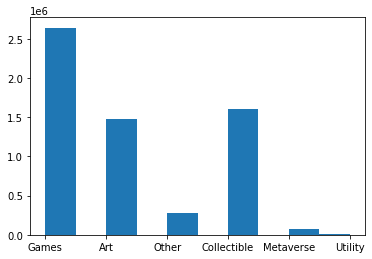

In [15]:
# Further data exploration:
plt.hist(nft_cleaned_df.Category)
plt.show()

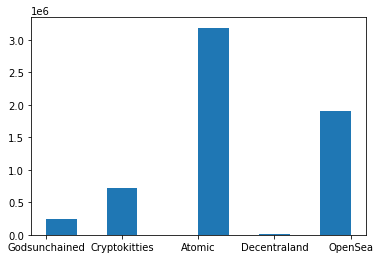

In [16]:
plt.hist(nft_cleaned_df.Market)
plt.show()

NameError: name 'nft_cleaned_df_2' is not defined

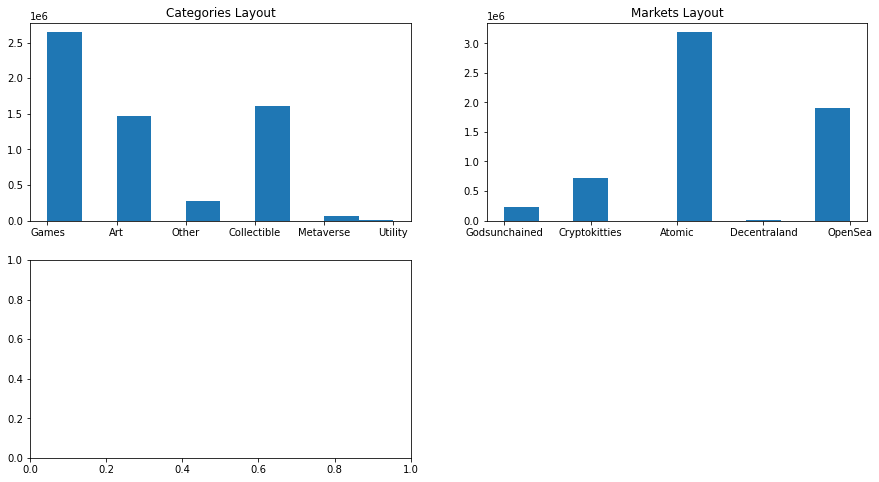

In [17]:
plt.figure(figsize=(15,8))

plt.subplot(2, 2, 1)
plt.hist(nft_cleaned_df.Category)
plt.title('Categories Layout')

plt.subplot(2, 2, 2)
plt.hist(nft_cleaned_df.Market)
plt.title('Markets Layout')

plt.subplot(2,2,3)
plt.scatter(nft_cleaned_df['Category'], nft_cleaned_df_2['Price_USD'])
plt.title("Category vs Price_USD")

plt.subplot(2,2,4)
plt.scatter(nft_cleaned_df['Market'], nft_cleaned_df_2['Price_USD'])
plt.title("Market vs Price_USD")

plt.show()

In [19]:
# Let's create dummies for "Category" and "Market" 
# and add them as columns into the nft_cleaned_df dataset:
nft_cleaned_df = pd.concat([nft_cleaned_df, pd.get_dummies(nft_cleaned_df.Category, prefix="Category", drop_first=True)], axis=1)
nft_cleaned_df = pd.concat([nft_cleaned_df, pd.get_dummies(nft_cleaned_df.Market, prefix="Market", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(nft_cleaned_df.Category, prefix="Category", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(nft_cleaned_df.Market, prefix="Market", drop_first=True).columns)

In [20]:
nft_cleaned_df.head()

,ID_token,Seller_username,Buyer_username,Image_url_1,Price_Crypto,Crypto,Price_USD,Name,Description,Market,...,Category,Category_Collectible,Category_Games,Category_Metaverse,Category_Other,Category_Utility,Market_Cryptokitties,Market_Decentraland,Market_Godsunchained,Market_OpenSea
0,87094722.0,NaN,NaN,https://card.godsunchained.com/?id=33&q=4,0.0002,ETH,0.030318,NaN,NaN,Godsunchained,...,Games,0,1,0,0,0,0,0,1,0
1,73044643.0,NaN,NaN,https://card.godsunchained.com/?id=79&q=4,0.0013,ETH,0.197067,NaN,NaN,Godsunchained,...,Games,0,1,0,0,0,0,0,1,0
2,17107482.0,NaN,NaN,https://card.godsunchained.com/?id=33&q=4,0.0002,ETH,0.030318,NaN,NaN,Godsunchained,...,Games,0,1,0,0,0,0,0,1,0
3,82230857.0,NaN,NaN,https://card.godsunchained.com/?id=227&q=4,0.0022,ETH,0.333498,NaN,NaN,Godsunchained,...,Games,0,1,0,0,0,0,0,1,0
4,40925443.0,NaN,NaN,https://card.godsunchained.com/?id=62&q=4,0.0012,ETH,0.181908,NaN,NaN,Godsunchained,...,Games,0,1,0,0,0,0,0,1,0


In [21]:
dummy_column_names

['Category_Collectible',
 'Category_Games',
 'Category_Metaverse',
 'Category_Other',
 'Category_Utility',
 'Market_Cryptokitties',
 'Market_Decentraland',
 'Market_Godsunchained',
 'Market_OpenSea']

In [22]:
nft_cleaned_df.dropna(subset=['Price_USD'], inplace=True)

In [23]:
total_missing = nft_cleaned_df.isnull().sum().sort_values(ascending=False)
percent_missing = (nft_cleaned_df.isnull().sum()/nft_cleaned_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

# nft_cleaned_df_2['number_of_nan_in_Price_USD'] = nft_cleaned_df_2['Price_USD'].sum(nft_cleaned_df_2['Price_USD']!=dtypes(float64))

,Total,Percent
Buyer_username,5176346,0.853796
Seller_username,4976517,0.820836
Description,4339435,0.715754
Name,4218572,0.695819
Image_url_1,54798,0.009038
ID_token,0,0.000000
Category_Collectible,0,0.000000
Market_Godsunchained,0,0.000000
Market_Decentraland,0,0.000000
Market_Cryptokitties,0,0.000000


In [25]:
import statsmodels.api as sm

# "Y" is the target veriable:
Y = nft_cleaned_df['Price_USD']

# "X" is the feature set:
X = nft_cleaned_df[dummy_column_names]

# Adding a constant to the model:
X = sm.add_constant(X)

# Fit an OLS model using statsmodels:
results = sm.OLS(Y, X).fit()

# Print the summery results:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_USD   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1677.
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        02:30:33   Log-Likelihood:            -6.0798e+07
No. Observations:             6062744   AIC:                         1.216e+08
Df Residuals:                 6062734   BIC:                         1.216e+08
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  590.8656 

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 4850195
The number of observations in test set is 1212549


In [27]:
X_train = sm.add_constant(X_train)

# Fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# Print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_USD   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3317.
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        02:30:39   Log-Likelihood:            -4.6364e+07
No. Observations:             4850195   AIC:                         9.273e+07
Df Residuals:                 4850185   BIC:                         9.273e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  576.4658 

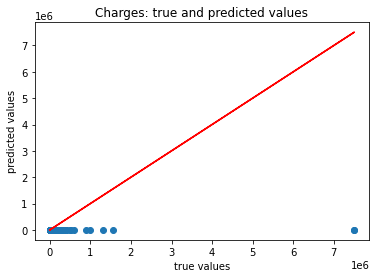

Mean absolute error of the prediction is: 254.1278310529457
Mean squared error of the prediction is: 103184182.99549931
Root mean squared error of the prediction is: 10157.96155709891
Mean absolute percentage error of the prediction is: 89369674754393.66


In [28]:
# Add a constant to the model because it's best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# You are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

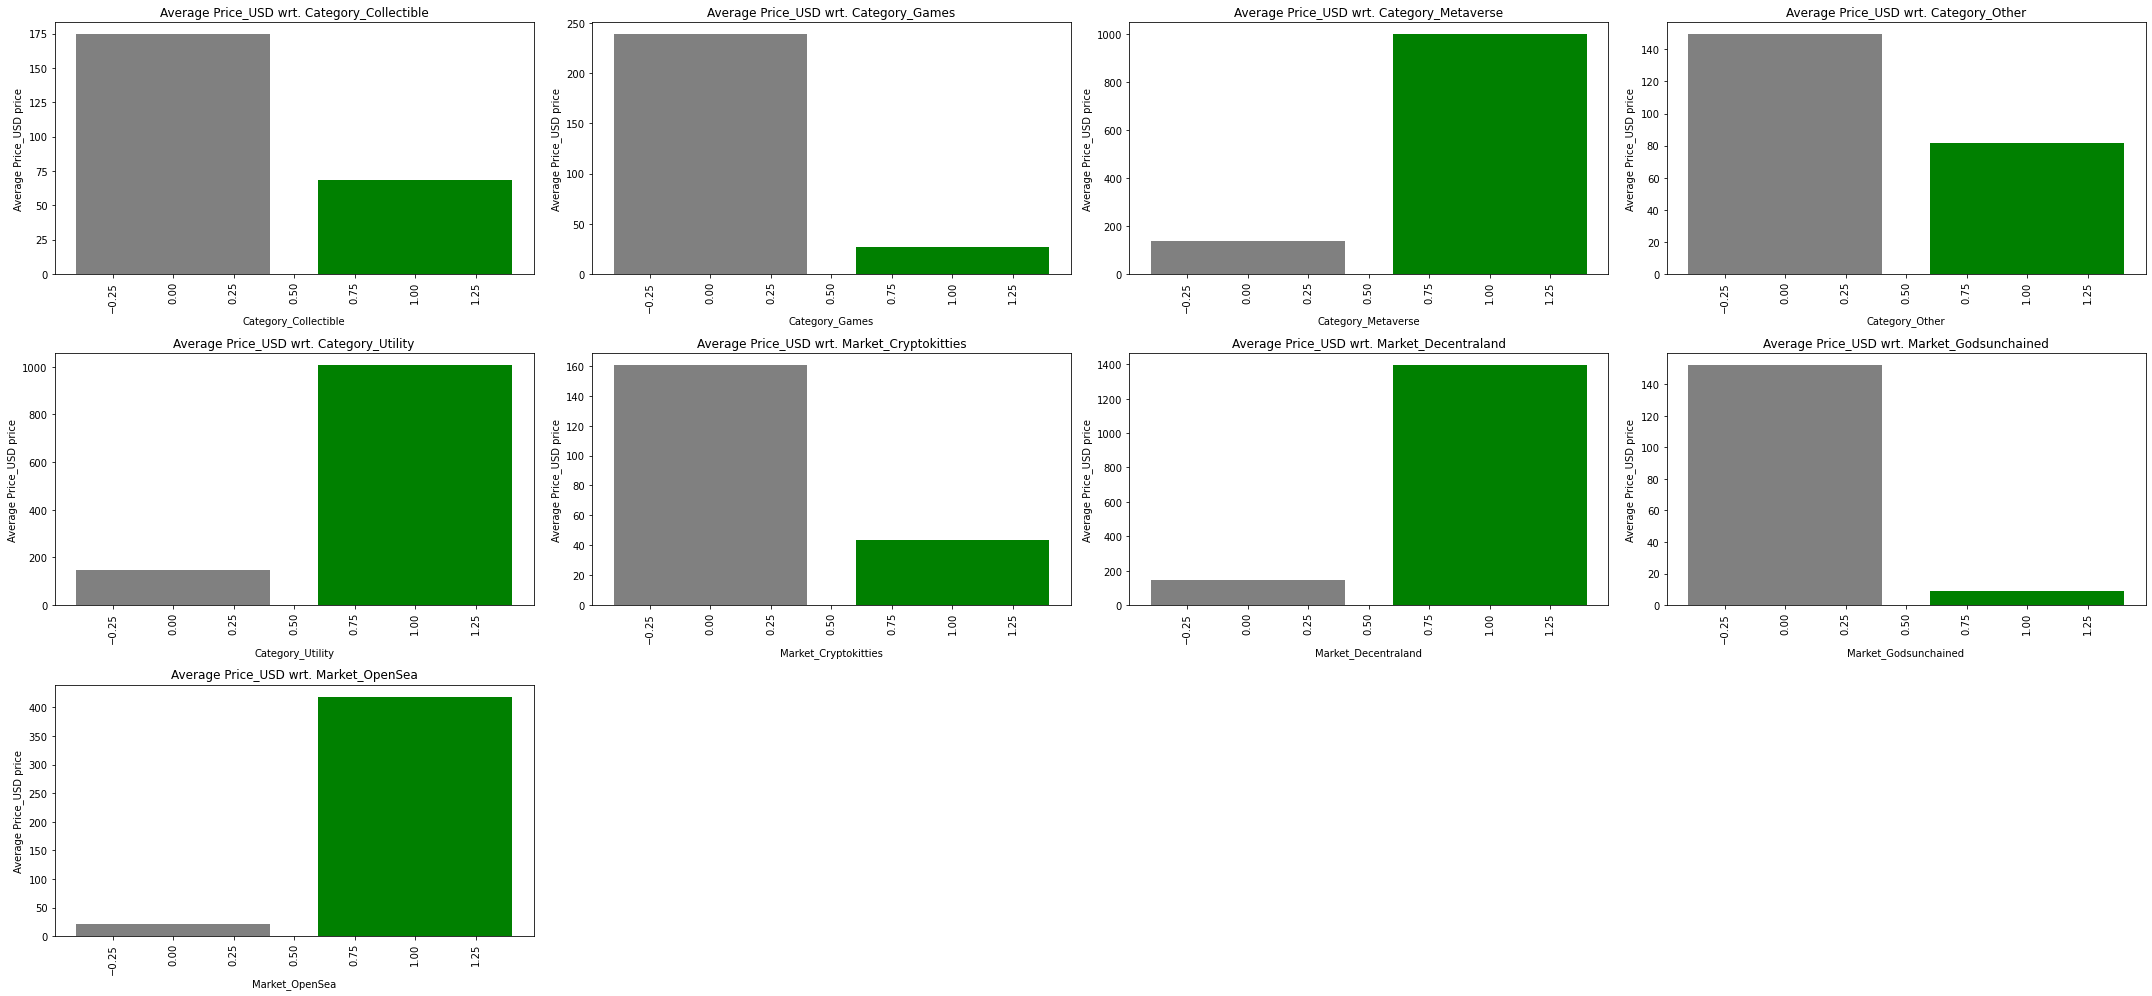

In [29]:
plt.figure(figsize=(30,50))

for index, column in enumerate(dummy_column_names):
    plt.subplot(11,4,index+1)
    plt.bar(nft_cleaned_df.groupby(column)['Price_USD'].mean().index, nft_cleaned_df.groupby(column)["Price_USD"].mean(),
           color=("grey","green"))
    plt.title("Average Price_USD wrt. {}".format(column))
    plt.ylabel("Average Price_USD price")
    plt.xlabel(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

In [30]:
# "Y" is the target veriable:
Y = nft_cleaned_df['Price_USD']

# "X" is the feature set:
X = nft_cleaned_df[dummy_column_names]

# Adding a constant to the model:
X = sm.add_constant(X)

# Fit an OLS model using statsmodels:
results = sm.OLS(Y, X).fit()

# Print the summery results:
print(results.summary())

# MANAGE OVERFITTING AND REGULARIZATION:

# `Y` is the target variable
Y = nft_cleaned_df['Price_USD']

numerical_cols = [col_name for col_name in nft_cleaned_df.dtypes[nft_cleaned_df.dtypes.values == 'int64'].index 
                    if col_name not in ["id", "saleprice"] ]

X = nft_cleaned_df[numerical_cols]

X = pd.concat([X**i for i in range(1,21)], axis=1)

# `X` is the feature set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

# Fit an OLS model using scikit-learn
# lrm = LinearRegression()
# lrm.fit(X_train, y_train)


# You are making predictions here
# y_preds_train = lrm.predict(X_train)
# y_preds_test = lrm.predict(X_test)

# print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
# print("-----Test set statistics-----")
# print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
# print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
# print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
# print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
# print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

                            OLS Regression Results                            
Dep. Variable:              Price_USD   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1677.
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        02:30:51   Log-Likelihood:            -6.0798e+07
No. Observations:             6062744   AIC:                         1.216e+08
Df Residuals:                 6062734   BIC:                         1.216e+08
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  590.8656 

In [31]:

# low_price_nft = []
# high_price_nft = []
# for i in nft_cleaned_df['Price_USD']:
#     if i < np.median(nft_cleaned_df['Price_USD']):
#         low_price_nft.append(i)
#     else:
#         high_price_nft.append(i)
# print(low_price_nft)
# print(high_price_nft)
#     return low_price_nft, high_price_nft



# nft_cleaned_df['Price_USD'].sort()
print(np.median(nft_cleaned_df['Price_USD']))



1.42647


In [32]:
low_price_nft = nft_cleaned_df.Price_USD[nft_cleaned_df['Price_USD'] < 1.42647]
high_price_nft = nft_cleaned_df.Price_USD[nft_cleaned_df['Price_USD'] >= 1.42647]

In [33]:
print(low_price_nft)
print(high_price_nft)

0          0.030318
1          0.197067
2          0.030318
3          0.333498
4          0.181908
             ...   
6069846    1.083832
6070147    0.967708
6070156    0.191739
6070246    0.483854
6070398    0.193542
Name: Price_USD, Length: 3031257, dtype: float64
8            8.337450
10           8.185860
11           8.185860
13           8.185860
33          10.338438
              ...    
6071022    967.707500
6071023     96.770750
6071024     35.805177
6071025     19.354150
6071026     19.354150
Name: Price_USD, Length: 3031487, dtype: float64


In [34]:
# Reduce the dataset by randomely sampling it down to 50,000 rows:
sampled_numeric = nft_cleaned_df.sample(n=50000)
sampled_numeric.head()

,ID_token,Seller_username,Buyer_username,Image_url_1,Price_Crypto,Crypto,Price_USD,Name,Description,Market,...,Category,Category_Collectible,Category_Games,Category_Metaverse,Category_Other,Category_Utility,Market_Cryptokitties,Market_Decentraland,Market_Godsunchained,Market_OpenSea
3381171,1099520442631,NaN,NaN,QmVUZHpUkc3PuLkJ7BDvJ3S3AgDySjsqWQib1sVKziHCbS,5.9800,WAX,1.500382,NaN,NaN,Atomic,...,Games,0,1,0,0,0,0,0,0,0
4760243,20069873,NaN,NaN,https://lh3.googleusercontent.com/TgQRaX97CCof...,0.0007,WETH,0.108174,Sit Down ID #20069873,Set a creature's strength to 0.\nAt the start ...,OpenSea,...,Games,0,1,0,0,0,0,0,0,1
5076178,204677361,gidonist,StrongHands,https://lh3.googleusercontent.com/db74z5uAvxiX...,0.0002,WETH,0.038065,Wiccan Warrior ID #204677361,Hidden for 1 turn.,OpenSea,...,Games,0,1,0,0,0,0,0,0,1
4248754,855860,NaN,PengoCat,https://storage.opensea.io/0x06012c8cf97bead5d...,0.0020,ETH,0.570070,NaN,Ohayou. I'm known as Kitty #855860. I have a c...,OpenSea,...,Art,0,0,0,0,0,0,0,0,1
5859183,9994823775714541748186203333675565901502035980...,SaveTheDate,NaN,https://lh3.googleusercontent.com/v8AnOduV4jU8...,0.0700,ETH,127.284500,"May 27th, 1937",The Golden Gate Bridge is a suspension bridge ...,OpenSea,...,Other,0,0,0,1,0,0,0,0,1


In [35]:
print(np.median(sampled_numeric['Price_USD']))

1.4031


In [36]:
low_price_nft_sampled = sampled_numeric.Price_USD[sampled_numeric['Price_USD'] < 1.4666952707624257]
high_price_nft_sampled = sampled_numeric.Price_USD[sampled_numeric['Price_USD'] >= 1.4666952707624257]
print(low_price_nft_sampled)
print(high_price_nft_sampled)

4760243    0.108174
5076178    0.038065
4248754    0.570070
4394863    0.666300
2752883    0.147825
             ...   
3468772    0.101950
1626245    0.651800
37573      0.028538
2011518    0.718688
1179651    0.027626
Name: Price_USD, Length: 25277, dtype: float64
3381171      1.500382
5859183    127.284500
186842       2.551783
5268059     57.923250
3448541      7.134461
              ...    
3051878     25.850050
5823442     94.239750
1264671     23.507250
6037735    222.025741
2430193      4.552800
Name: Price_USD, Length: 24723, dtype: float64


In [37]:
sampled_numeric_cleaned = sampled_numeric.drop(['Price_Crypto', 'Image_url_1', 'ID_token', 'Seller_username', 'Buyer_username',
                                                     'Crypto', 'Name', 'Description', 'Market', 'Category',
                                                'Unique_id_collection', 'Collection_cleaned', 'Datetime_updated_seconds'], 1)

sampled_numeric_cleaned.head(10)

,Price_USD,Category_Collectible,Category_Games,Category_Metaverse,Category_Other,Category_Utility,Market_Cryptokitties,Market_Decentraland,Market_Godsunchained,Market_OpenSea
3381171,1.500382,0,1,0,0,0,0,0,0,0
4760243,0.108174,0,1,0,0,0,0,0,0,1
5076178,0.038065,0,1,0,0,0,0,0,0,1
4248754,0.570070,0,0,0,0,0,0,0,0,1
5859183,127.284500,0,0,0,1,0,0,0,0,1
4394863,0.666300,0,0,0,0,0,0,0,0,1
2752883,0.147825,0,1,0,0,0,0,0,0,0
186842,2.551783,0,1,0,0,0,0,0,1,0
4327785,0.464325,0,0,0,0,0,0,0,0,1
1724607,0.802950,1,0,0,0,0,0,0,0,0


In [38]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = sampled_numeric_cleaned.drop('Price_USD', 1)
Y = sampled_numeric_cleaned['Price_USD']
X = pd.get_dummies(X)

cross_val_score(rfc, X, Y, cv=5)

array([nan, nan, nan, nan, nan])

In [39]:
sampled_numeric_cleaned.tail()

,Price_USD,Category_Collectible,Category_Games,Category_Metaverse,Category_Other,Category_Utility,Market_Cryptokitties,Market_Decentraland,Market_Godsunchained,Market_OpenSea
1626245,0.651800,1,0,0,0,0,0,0,0,0
37573,0.028538,0,1,0,0,0,0,0,1,0
2011518,0.718688,1,0,0,0,0,0,0,0,0
1179651,0.027626,0,0,0,1,0,0,0,0,0
2430193,4.552800,0,1,0,0,0,0,0,0,0


In [40]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = sampled_numeric_cleaned.drop('Price_USD', 1)
Y = sampled_numeric_cleaned['Price_USD']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

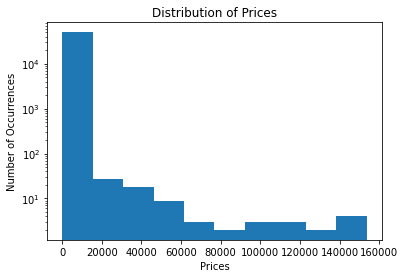

In [41]:
plt.hist(sampled_numeric_cleaned['Price_USD'], log=True)
plt.title('Distribution of Prices')
plt.xlabel('Prices')
plt.ylabel('Number of Occurrences')
plt.show()

In [42]:
# `Y` is the target variable (what you are trying to predict):
Y = sampled_numeric_cleaned['Price_USD'] 

# `X` is the feature set:
X = sampled_numeric_cleaned[dummy_column_names]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in the training set is {}".format(X_train.shape[0]))
print("The number of observations in the test set is {}".format(X_test.shape[0]))

# Add a constant to the model because it's best practice
# to do so every time!
X_train = sm.add_constant(X_train)

# Fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# Print the summary results
print(results.summary())

The number of observations in the training set is 40000
The number of observations in the test set is 10000
                            OLS Regression Results                            
Dep. Variable:              Price_USD   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     61.74
Date:                Tue, 25 Jan 2022   Prob (F-statistic):          4.36e-113
Time:                        02:31:11   Log-Likelihood:            -3.6854e+05
No. Observations:               40000   AIC:                         7.371e+05
Df Residuals:                   39990   BIC:                         7.372e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------

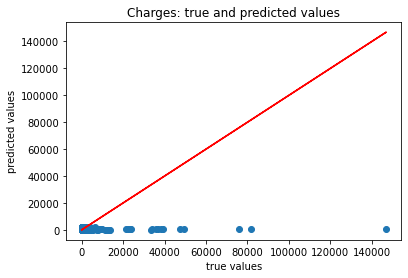

Mean absolute error of the prediction is: 251.92376597175138
Mean squared error of the prediction is: 5026981.343429145
Root mean squared error of the prediction is: 2242.0930719818803
Mean absolute percentage error of the prediction is: 34295633.0877015


In [43]:
# Add a constant to the model:
X_test = sm.add_constant(X_test)

# Making our predictions here:
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [46]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = sampled_numeric_cleaned[dummy_column_names]
Y = sampled_numeric_cleaned['Price_USD'] 
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[24, 190]])

ValueError: Unknown label type: 'continuous'

After running all the models above we can conclude with a substential amount of certainty that the price
an NFT is sold for, cannot be predicted by the market it is sold in or what collection
it belongs to.

In [45]:
# This is the model that you'll be using:
from sklearn import tree


# A convenience for displaying visualizations:
from IPython.display import Image

# Packages for rendering the tree:
import pydotplus
import graphviz

# Initialize and train the tree:
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(nft_cleaned_df, nft_cleaned_df['Price_USD'])

# Render the tree:
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning', 'Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

ValueError: could not convert string to float: 'stealtime'